# Doğrusal Regresyon Egzersizleri

50 adet Startup'ın araştırma ve geliştirmeye yönelik harcaması, yönetime yönelik harcaması, pazarlama harcaması, kazandıkları kar miktarı ve kuruldukları lokasyon bilgisi bulunmaktadır. Amaç kar miktarını tahmin etmektir. Bu bir sayısal tahmin problemidir ve bağımlı değişkenimiz "Profit".

Numpy, matplotlib.pyplot, pandas ve seaborn kütüphanelerini çekirdeğe dahil edelim.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Dizinde bulunan veri çerçevemizi startups değişkenine atayalım. startups değişkenini df değişkenine kopyalayarak kullanmaya başlayalım.

In [2]:
startups = pd.read_csv("50_Startups.csv")
df = startups.copy()

İlk 5 gözlemini yazdıralım.

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Veri çerçevesinin bilgilerini görüntüleyelim.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Kaç gözlem ve öznitelikten oluştuğunu görüntüleyelim.

In [5]:
df.shape

(50, 5)

Eksik verileri kontrol edelim.

In [6]:
#df.isnull().sum()
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Korelasyon matrisi çizdirelim.

In [7]:
corr = df.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Seaborn ile korelasyon matrisinin ısı haritasını çizdirelim.

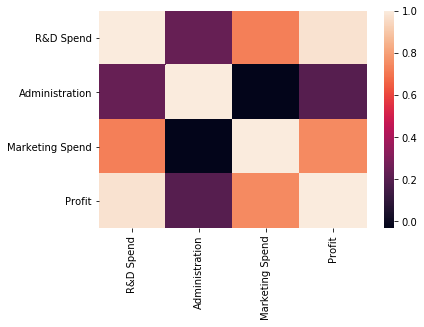

In [8]:
sns.heatmap(corr)

R&D Spend ve Profit arasındaki korelasyonu daha iyi görebilmek için scatterplot çizdirelim.

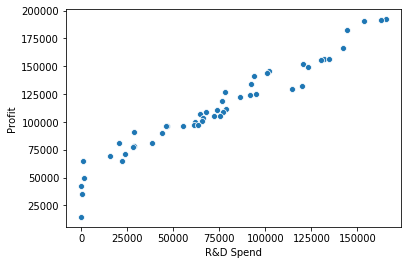

In [9]:
sns.scatterplot(x = "R&D Spend", y = "Profit", data=df)

Sayısal değişkenlerin dağılımını görmek için df üzerinden histogram çizdirelim.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D59C8721C8>,
      dtype=object)

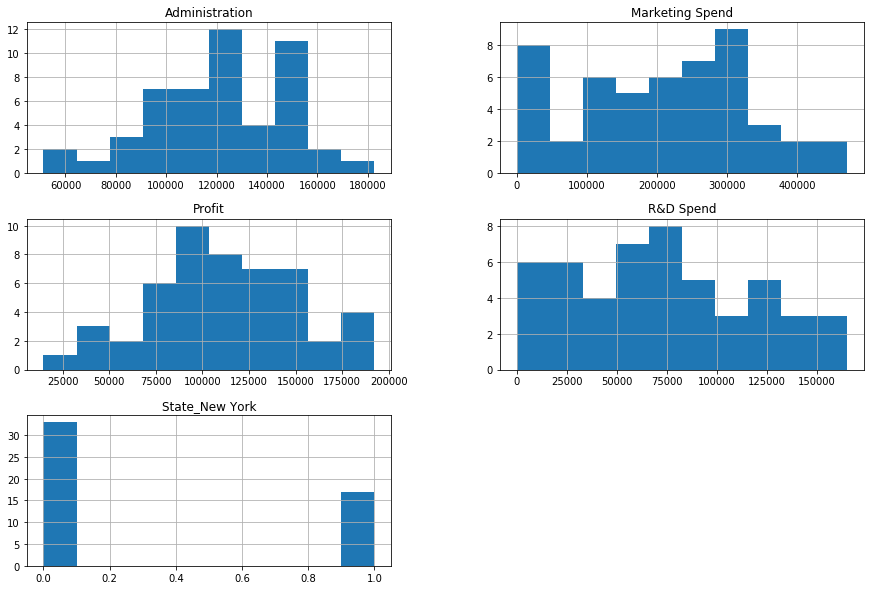

In [77]:
df.hist(figsize=(15,10))

Veri çerçevesinin temel istatistik değerlerini görüntüleyelim.

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


State'a ait benzersiz değerleri görüntüleyelim.

In [15]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

get_dummies yardımıyla State'a dair kategorik öznitelik çıkarımlarında bulunalım. Çünkü State'ların birbirine üstünlüğü yok, nominaller. Ordinal değil.

In [16]:
df["State"] = pd.Categorical(df["State"])

In [17]:
dfDummies = pd.get_dummies(df["State"],prefix = "State")
dfDummies

,State_California,State_Florida,State_New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [18]:
df = pd.concat([df,dfDummies],axis=1)

In [19]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


State özniteliğini silip dummy olarak yaratılan State'lardan da birisini hariç tutarak veri çerçevemizi güncelleyelim.

In [20]:
df.drop(["State","State_California","State_Florida"],axis=1 ,inplace= True)

In [21]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_New York
0,165349.20,136897.80,471784.10,192261.83,1
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,0
3,144372.41,118671.85,383199.62,182901.99,1
4,142107.34,91391.77,366168.42,166187.94,0
